In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("C:\\Users\\pdeep\\Downloads\\sbi_data.csv")


In [6]:
df.head()

,Date,NAV,Shares_Outstanding
0,2018-01-01,100,100000
1,2018-02-01,110,120000
2,2018-03-01,120,140000
3,2018-04-01,115,130000
4,2018-05-01,125,150000


In [7]:
df['MarketCapital'] = df.NAV * df.Shares_Outstanding

In [8]:
df.sample(3)

,Date,NAV,Shares_Outstanding,MarketCapital
32,2020-09-01,186,270000,50220000
12,2019-01-01,135,170000,22950000
2,2018-03-01,120,140000,16800000


In [9]:
print(sum(df.MarketCapital))

1179180000


In [10]:
df['MarketShare'] = (df.MarketCapital /1179180000) *100

In [11]:
df.sample(2)

,Date,NAV,Shares_Outstanding,MarketCapital,MarketShare
13,2019-02-01,145,185000,26825000,2.274886
33,2020-10-01,192,285000,54720000,4.640513


In [13]:
df['Growth_Rate'] = df['NAV'].pct_change()
df.sample()

,Date,NAV,Shares_Outstanding,MarketCapital,MarketShare,Growth_Rate
6,2018-07-01,130,160000,20800000,1.763938,0.065574


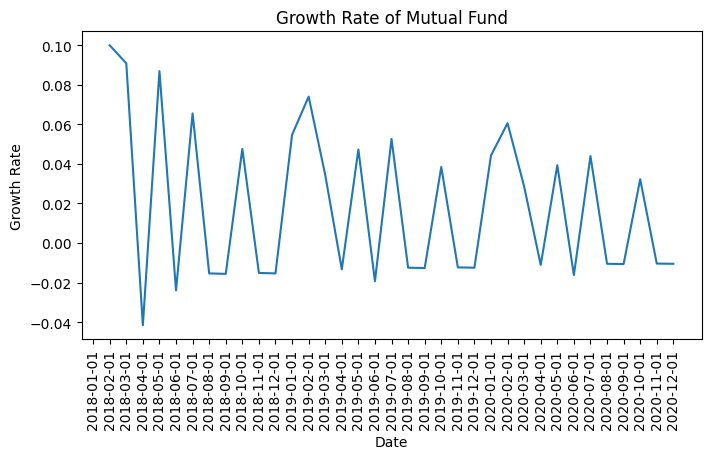

In [39]:
# visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.lineplot(x='Date', y='Growth_Rate', data=df)
plt.title('Growth Rate of Mutual Fund')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.xticks(rotation=90)  # Set xtick rotation to 90
plt.show()

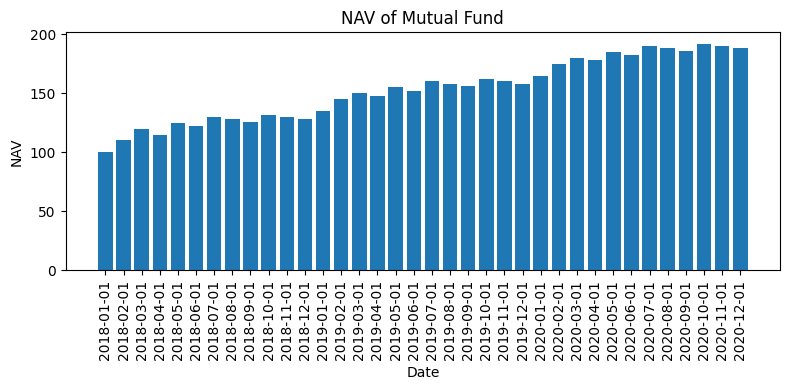

In [38]:
# Barchart
plt.figure(figsize=(8, 4))
plt.bar(df["Date"], df["NAV"])
plt.title("NAV of Mutual Fund")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.xticks(rotation=90)  # Set xtick rotation to 90
plt.tight_layout()
plt.show()

In [21]:
df['Year'] = df['Date'].str[:4]

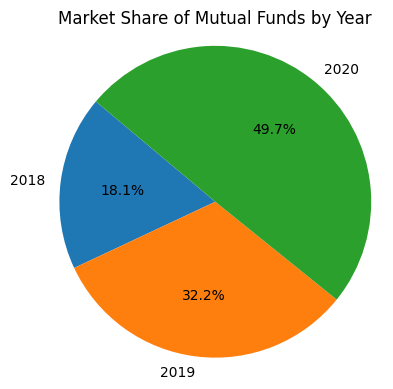

In [36]:

# donut chart

# Calculate the market share for each year
df_grouped = df.groupby('Year')['MarketShare'].sum()


plt.figure(figsize=(4, 4))
plt.pie(df_grouped, labels=df_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Mutual Funds by Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

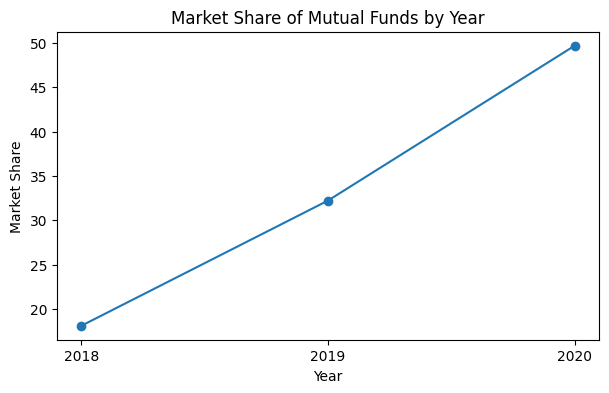

In [34]:
# Create the line chart
plt.figure(figsize=(7, 4))
plt.plot(df_grouped.index, df_grouped.values, marker='o')
plt.title('Market Share of Mutual Funds by Year')
plt.xlabel('Year')
plt.ylabel('Market Share')
plt.xticks(rotation=0)  # Set xtick rotation to 0

plt.show()

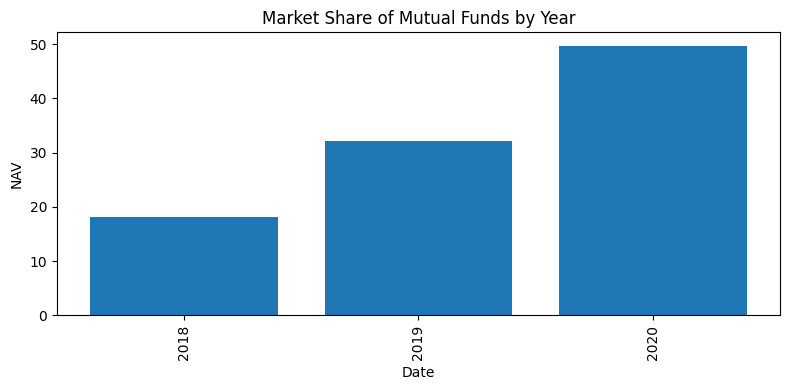

In [40]:
# Create the bar chart
plt.figure(figsize=(8, 4))
plt.bar(df_grouped.index, df_grouped.values)
plt.title("Market Share of Mutual Funds by Year")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.xticks(rotation=90)  # Set xtick rotation to 90
plt.tight_layout()
plt.show()